objective 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, classification_report
import joblib 

# Load the test data created in Objective 2
test_cleaned = pd.read_csv("cardio_test_cleaned.csv")
X_test = test_cleaned.drop('cardio', axis=1)
y_test = test_cleaned['cardio']

# LOAD the model you saved at the end of Objective 3
best_dt = joblib.load('cardio_model.pkl')

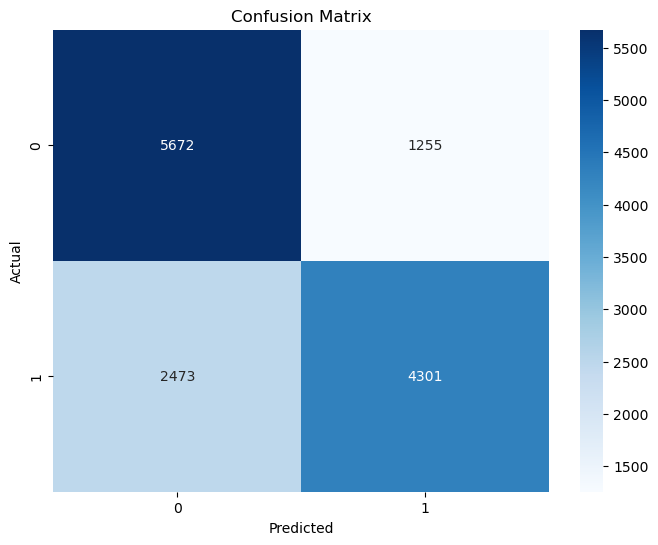

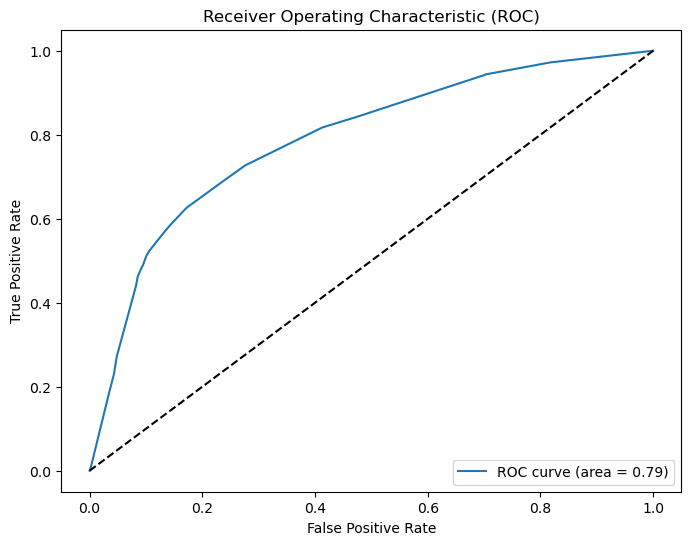

In [3]:
# Generate Predictions for plotting
y_pred = best_dt.predict(X_test)
y_prob = best_dt.predict_proba(X_test)[:, 1]

# 1. Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 2. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()